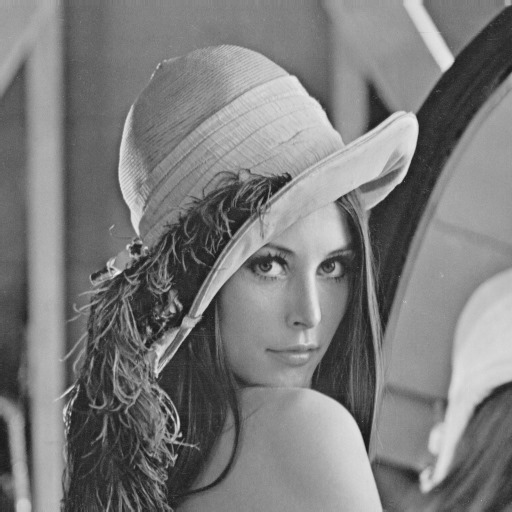

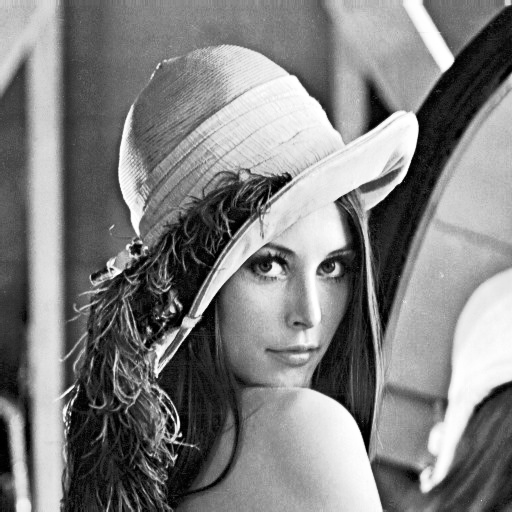

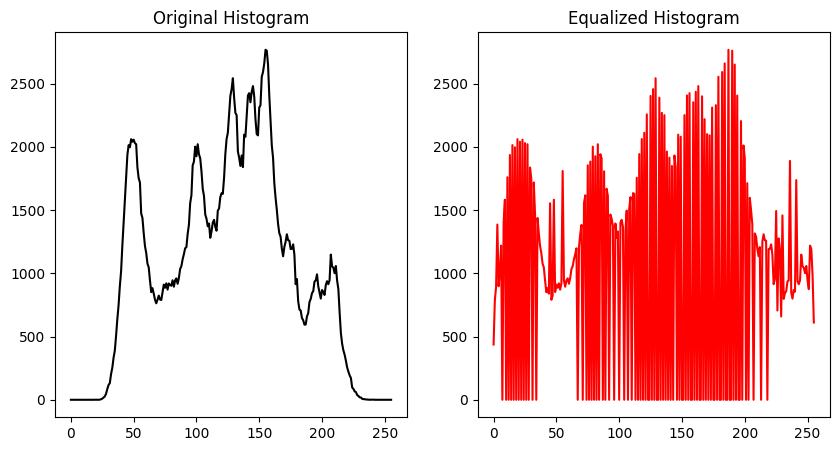

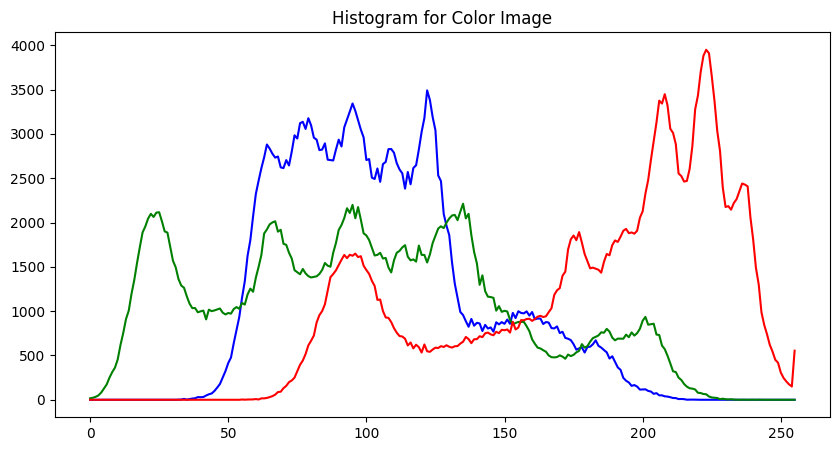

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # For displaying images in Google Colab

# Load a color image
image = cv2.imread('/content/img.jpeg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute histograms for grayscale image
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Apply Histogram Equalization
equalized_gray = cv2.equalizeHist(gray_image)
hist_eq = cv2.calcHist([equalized_gray], [0], None, [256], [0, 256])

# Display grayscale images
cv2_imshow(gray_image)
cv2_imshow(equalized_gray)

# Plot histograms before and after equalization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(hist_gray, color='black')
plt.title('Original Histogram')

plt.subplot(1, 2, 2)
plt.plot(hist_eq, color='red')
plt.title('Equalized Histogram')

plt.show()

# Process color image by splitting into channels
channels = cv2.split(image)
colors = ('b', 'g', 'r')

plt.figure(figsize=(10, 5))
for (channel, color) in zip(channels, colors):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)

plt.title('Histogram for Color Image')
plt.show()



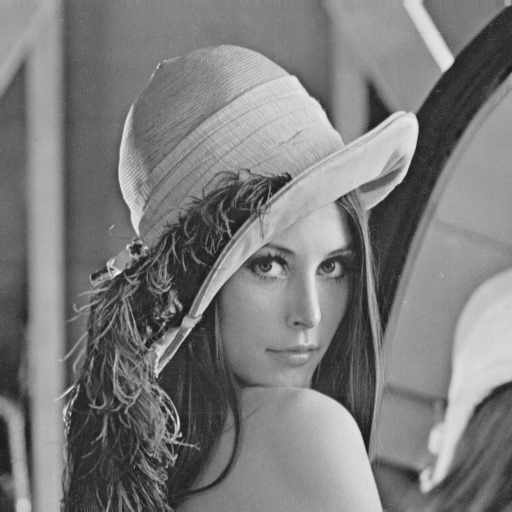

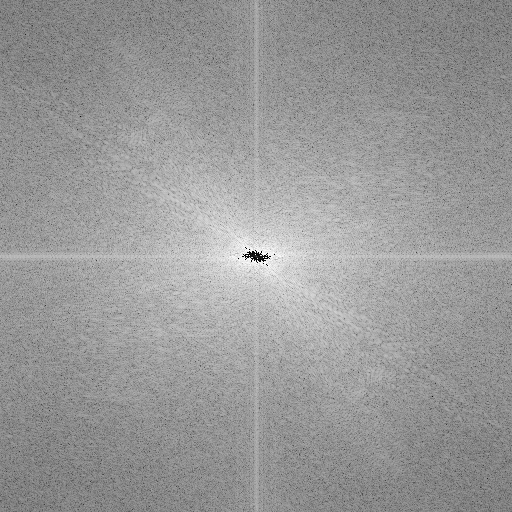

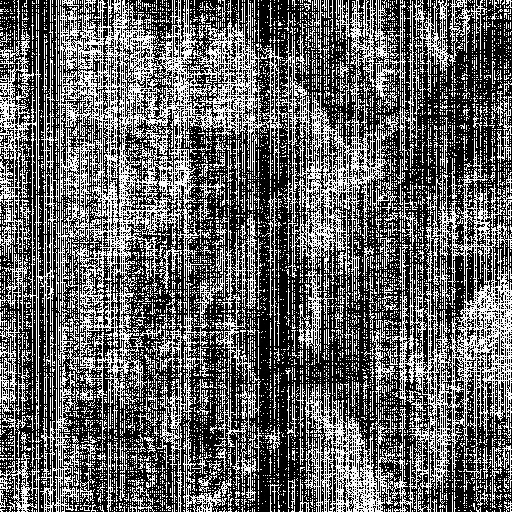

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Required for Google Colab

# Load a grayscale image
image = cv2.imread('/content/img.jpeg', cv2.IMREAD_GRAYSCALE)

# Compute FFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Compute magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Inverse FFT
dft_ishift = np.fft.ifftshift(dft_shift)
reconstructed_image = cv2.idft(dft_ishift)
reconstructed_image = cv2.magnitude(reconstructed_image[:, :, 0], reconstructed_image[:, :, 1])

# Display original image
cv2_imshow(image)

# Display magnitude spectrum
cv2_imshow(magnitude_spectrum.astype(np.uint8))

# Display reconstructed image
cv2_imshow(reconstructed_image.astype(np.uint8))


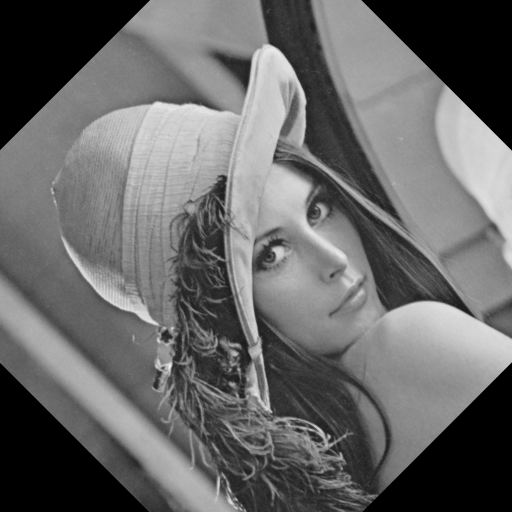

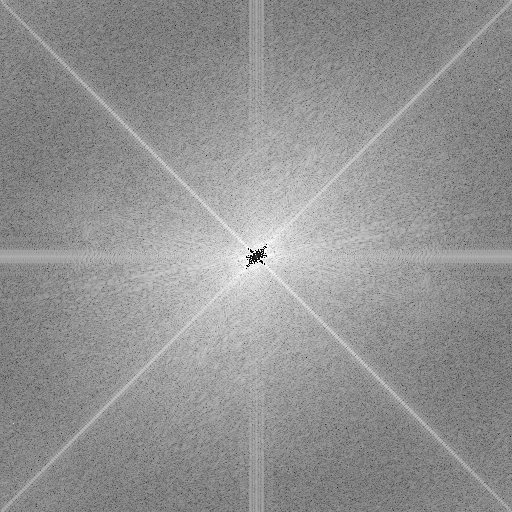

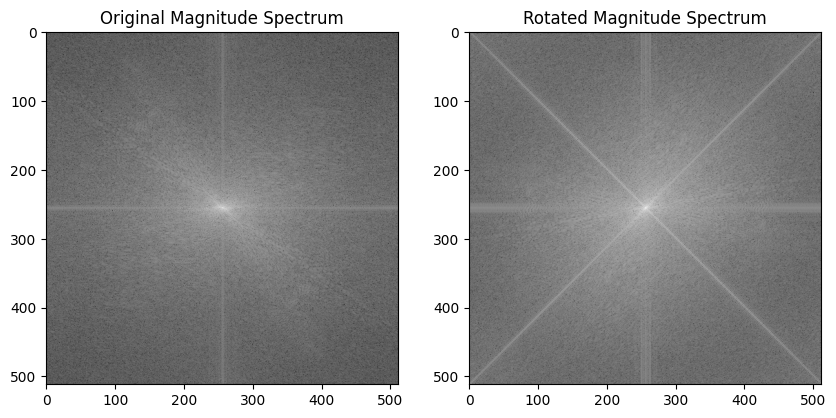

In [ ]:
# Rotate the image by 45 degrees
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

# Get rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)

# Perform rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Compute FFT of rotated image
dft_rotated = cv2.dft(np.float32(rotated_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift_rotated = np.fft.fftshift(dft_rotated)

# Compute magnitude spectrum of rotated image
magnitude_spectrum_rotated = 20 * np.log(cv2.magnitude(dft_shift_rotated[:, :, 0], dft_shift_rotated[:, :, 1]))

# Display images
cv2_imshow(rotated_image)
cv2_imshow(magnitude_spectrum_rotated.astype(np.uint8))

# Compare with original magnitude spectrum
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original Magnitude Spectrum')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.title('Rotated Magnitude Spectrum')

plt.show()